#Machine Learning DS - Final Assiagnment
##Roie Kimchi & Roei Vider

This work is divided into three main parts. The first part is based on solving a classification problem that examines the risk of asteroids to the Earth. The second part is based on predicting apartment prices in Poland based on data from June 2024. The third part deals with building neural network models for solving a classification problem and building a recommendation system.

If there is a need to run the code, make sure that run type is on GPU for faster load.

# Part A

### Q1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):   # From Introduction to DS
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Q2

In [ ]:
df_nasa = pd.read_csv('nasa.csv')

In [ ]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
X = df_nasa.drop('Hazardous', axis=1)
y = df_nasa['Hazardous']
print(X.shape)
print(y.shape)

(4687, 39)
(4687,)


# Part A

###Q3


In [ ]:
print(df_nasa.isnull().sum())

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [ ]:
X.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [ ]:
print(X[['Equinox','Orbiting Body','Orbit Determination Date','Close Approach Date']].apply(pd.unique))
print(X[['Close Approach Date','Orbit Determination Date']].nunique())

# Used with chatgpt to print unique values

Equinox                                                               [J2000]
Orbiting Body                                                         [Earth]
Orbit Determination Date    [2017-04-06 08:36:37, 2017-04-06 08:32:49, 201...
Close Approach Date         [1995-01-01, 1995-01-08, 1995-01-15, 1995-01-2...
dtype: object
Close Approach Date          777
Orbit Determination Date    2680
dtype: int64


In [ ]:
X.drop(['Name','Neo Reference ID' ,'Orbiting Body', 'Equinox','Orbit Determination Date','Close Approach Date'], axis=1, inplace=True)
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Epoch Date Close Approach     4687 non-null   int64  
 10  Relative Velocity km per sec  4687 non-null   float64
 11  Relative Velocity km per hr   4687 non-null   float64
 12  Miles per hour                4687 non-null   float64
 13  Mis

In [ ]:
y.head()

0     True
1    False
2     True
3    False
4     True
Name: Hazardous, dtype: bool

In [ ]:
mapping = {True:1, False:0}
y = y.map(mapping)
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(4687, 33)
(4687,)


### Q4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3749, 33)
(938, 33)
(3749,)
(938,)


### Q5

In [ ]:
y.value_counts()

Hazardous
0    3932
1     755
Name: count, dtype: int64

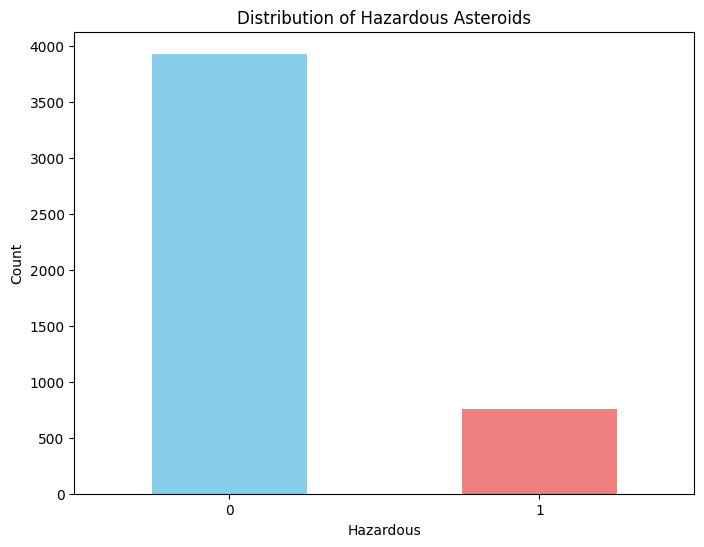

In [ ]:
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Used with ColabAI to plot the graph.

(1220, 33)
(1220,)

Hazardous
0    610
1    610
Name: count, dtype: int64



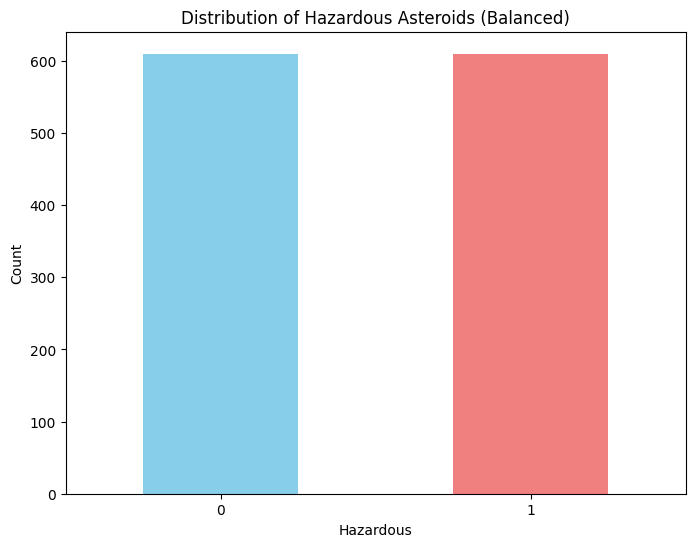

In [ ]:
nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

print(X_resampled.shape)
print(y_resampled.shape)
print()
print(y_resampled.value_counts())
print()

plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Hazardous Asteroids (Balanced)')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Used with ColabAI to plot the graph.

Balancing the data is essential due to a lot of non-hazardous observations, which would bias the model and lead to poor performance in  identifying hazardous asteroids.We chose NearMiss for undersampling because it reduces the majority class by selecting samples nearest to the minority class.
This method improves the model's ability to classify the minority class correctly.

NearMiss is a good method for highly imbalanced datasets, preserving minority class characteristics, and when undersampling is preferred.

### Q6

In [ ]:
# XGBoost & Random Forest


scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

print(X_resampled.describe())
print(X_test.describe())

       Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
count        1.220000e+03        1.220000e+03        1.220000e+03   
mean         9.318593e-16        9.318593e-17        2.329648e-17   
std          1.000410e+00        1.000410e+00        1.000410e+00   
min         -2.748420e+00       -8.254717e-01       -8.254717e-01   
25%         -6.815857e-01       -5.670941e-01       -5.670941e-01   
50%         -1.427461e-01       -2.773488e-01       -2.773488e-01   
75%          4.735516e-01        2.255849e-01        2.255849e-01   
max          3.475177e+00        1.171713e+01        1.171713e+01   

       Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  \
count       1.220000e+03       1.220000e+03           1.220000e+03   
mean       -6.988945e-17       2.329648e-17          -5.824121e-17   
std         1.000410e+00       1.000410e+00           1.000410e+00   
min        -8.254717e-01      -8.254717e-01          -8.254717e-01   
25%        -5.670941e-01    

In [ ]:
# XGBoost:

param_grid_XGB1 = {'max_depth': range(3, 10),
                   'learning_rate': np.arange(0.01,0.2,0.01)}
grid_search_XGB1 = GridSearchCV(XGBClassifier(), param_grid_XGB1, cv=5,scoring="balanced_accuracy")
grid_search_XGB1.fit(X_train, y_train)

print("Best parameters XGB max_depth:", grid_search_XGB1.best_params_)
print("Best score XGB max_depth:", grid_search_XGB1.best_score_)
print()

# Range in learning rate was solved with ChatGPT

Best parameters XGB max_depth: {'learning_rate': 0.09, 'max_depth': 4}
Best score XGB max_depth: 0.9956064078294972



max_depth: determines tree depth. Taller trees can spot more details but might overfit, adjusting it ensures the right amount of detail without overfitting.

learning_rate (eta): Controls how much the model learns in each step. A smaller rate makes learning slower but steadier,
while a larger rate speeds up learning but might miss the best result.

In [ ]:
# Random Forest:

param_grid_RF = {'max_depth': range(3, 10),
                  'n_estimators': range(5,100,5)}
grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid_RF, cv=5,scoring="balanced_accuracy")
grid_search_RF.fit(X_train, y_train)

print("Best parameters RF max_depth:", grid_search_RF.best_params_)
print("Best score RF max_depth:", grid_search_RF.best_score_)

Best parameters RF max_depth: {'max_depth': 7, 'n_estimators': 25}
Best score RF max_depth: 0.991826772475723


max_depth: determines tree depth. Taller trees can spot more details but might overfit, adjusting it ensures the right amount of detail without overfitting.

n_estimators: The number of trees used to make predictions. More trees usually improve accuracy by averaging predictions but can also increase training time.

### Q7

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

model.summary()

# Used with ColabAI to create a basic model.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7414 - loss: 9243073536.0000 - val_accuracy: 0.1693 - val_loss: 226509200.0000
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6895 - loss: 543433408.0000 - val_accuracy: 0.8307 - val_loss: 681195008.0000
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7369 - loss: 677497088.0000 - val_accuracy: 0.8307 - val_loss: 1177252480.0000
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7408 - loss: 742309376.0000 - val_accuracy: 0.8307 - val_loss: 1419585408.0000
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7438 - loss: 890273920.0000 - val_accuracy: 0.8307 - val_loss: 513024544.0000
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7314 - loss: 896167424.0000 - val_accuracy: 0.1693 - val_loss: 398242336.0000
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - loss: 344426528.0000 - val_accuracy: 0.8307 - val_loss: 1353289344.0000
E

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,869 (50.27 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,580 (33.52 KB)

There are 3 layers: Input (64 neurons), Hidden (32 neurons), Output (1 neuron).
There are 2176 params in the first layer, 4256 in the second layer and a total of 4289 trainable params.
The first layer is the input layer, the seconed layer is a hidden layer. Both two layers are powered by the relu function and they are fully connected.
The last layere is the output layer with 1 nural powered by the sigmoid function.

### Q8

In [ ]:
bestmodel_XGB1 = grid_search_XGB1.best_estimator_
y_pred_XGB1 = bestmodel_XGB1.predict(X_test)
report_XGB1 = classification_report(y_test, y_pred_XGB1)
print("XGB Test performance:")
print(report_XGB1)
print()
bestmodel_XGB1 = grid_search_XGB1.best_estimator_
y_pred_XGB1 = bestmodel_XGB1.predict(X_train)
report_XGB1 = classification_report(y_train, y_pred_XGB1)
print("XGB Train performance:")
print(report_XGB1)
print()
bestmodel_RF = grid_search_RF.best_estimator_
y_pred_RF = bestmodel_RF.predict(X_test)
report_RF = classification_report(y_test, y_pred_RF)
print("Random Forest Test performance:")
print(report_RF)
print()
bestmodel_RF = grid_search_RF.best_estimator_
y_pred_RF = bestmodel_RF.predict(X_train)
report_RF = classification_report(y_train, y_pred_RF)
print("Random Forest Train performance:")
print(report_RF)
print()
print("NN Test performance:")
y_pred_prob_test = model.predict(X_test)
y_pred_N_test = (y_pred_prob_test > 0.5).astype(int).flatten()
report_test = classification_report(y_test, y_pred_N_test, target_names=['0', '1'])
print(report_test)
print()
print("NN Train performance:")
y_pred_prob_train = model.predict(X_train)
y_pred_N_train = (y_pred_prob_train > 0.5).astype(int).flatten()
report_train = classification_report(y_train, y_pred_N_train, target_names=['0', '1'])
print(report_train)

# Used with ChatGPT for NN part.

XGB Test performance:
              precision    recall  f1-score   support

           0       1.00      0.50      0.66       793
           1       0.27      1.00      0.42       145

    accuracy                           0.57       938
   macro avg       0.63      0.75      0.54       938
weighted avg       0.89      0.57      0.63       938


XGB Train performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3139
           1       1.00      1.00      1.00       610

    accuracy                           1.00      3749
   macro avg       1.00      1.00      1.00      3749
weighted avg       1.00      1.00      1.00      3749


Random Forest Test performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       793
           1       0.81      0.33      0.47       145

    accuracy                           0.88       938
   macro avg       0.85      0.66      0.70      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best model from the three is the Random Forest (based on accuracy : 0.88).

All models has a significant overfitting problem but the RF model has the lowest gap between the accuracy in the train and the test.

The best model from the three is the XGB model (based on recall : 1.00).

The Recall measures how well a model identifies all the actual positive cases. In our case, how much hazardous asteroids we predicted correctly from all actull hazardous asteorids.
Correct identification of all hazardous asteroids is critical because missing a hazardous asteroid can lead to serious consequences. A high recall helps prevent a situation where a dangerous asteroid passes through the control systems without being detected.

# Part B

### Q9

In [ ]:
df_price = pd.read_csv('Apartments6.24.csv')
print(df_price.shape)
print()
print(df_price.info())

(8849, 28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8849 non-null   object 
 1   city                  8849 non-null   object 
 2   type                  7019 non-null   object 
 3   squareMeters          8849 non-null   float64
 4   rooms                 8849 non-null   float64
 5   floor                 7796 non-null   float64
 6   floorCount            8694 non-null   float64
 7   buildYear             6600 non-null   float64
 8   latitude              8849 non-null   float64
 9   longitude             8849 non-null   float64
 10  centreDistance        8849 non-null   float64
 11  poiCount              8849 non-null   float64
 12  schoolDistance        8849 non-null   float64
 13  clinicDistance        8845 non-null   float64
 14  postOfficeDistance    8846 non-null   float64
 15  kindergar

In [ ]:
print(df_price.isnull().sum())

id                         0
city                       0
type                    1830
squareMeters               0
rooms                      0
floor                   1053
floorCount               155
buildYear               2249
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance             0
clinicDistance             4
postOfficeDistance         3
kindergartenDistance       3
restaurantDistance        16
collegeDistance          112
pharmacyDistance           7
ownership                  0
buildingMaterial        3505
condition               6329
hasParkingSpace            0
hasBalcony                 0
hasElevator              496
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64


In [ ]:
df_price = df_price.drop(['buildingMaterial', 'condition'], axis=1)

In [ ]:
print(df_price[['type','ownership','hasParkingSpace','hasBalcony',
                'hasElevator','hasSecurity','hasStorageRoom','city']].nunique())

type                3
ownership           1
hasParkingSpace     2
hasBalcony          2
hasElevator         2
hasSecurity         2
hasStorageRoom      2
city               15
dtype: int64


In [ ]:
print(df_price[['type','ownership','hasParkingSpace','hasBalcony',
                'hasElevator','hasSecurity','hasStorageRoom']].apply(pd.unique))

type               [blockOfFlats, apartmentBuilding, nan, tenement]
ownership                                             [condominium]
hasParkingSpace                                           [no, yes]
hasBalcony                                                [yes, no]
hasElevator                                          [no, yes, nan]
hasSecurity                                               [no, yes]
hasStorageRoom                                            [yes, no]
dtype: object


In [ ]:
df_price = df_price.drop(['ownership','city'], axis=1)
# More than 4 categories.

In [ ]:
map1 = {'blockOfFlats':1, 'apartmentBuilding':2, 'tenement':3}
map2 ={'yes':1, 'no':0}

df_price['type'] = df_price['type'].map(map1)
df_price['hasParkingSpace'] = df_price['hasParkingSpace'].map(map2)
df_price['hasBalcony'] = df_price['hasBalcony'].map(map2)
df_price['hasElevator'] = df_price['hasElevator'].map(map2)
df_price['hasSecurity'] = df_price['hasSecurity'].map(map2)
df_price['hasStorageRoom'] = df_price['hasStorageRoom'].map(map2)

print(df_price[['type','hasParkingSpace','hasBalcony',
                'hasElevator','hasSecurity','hasStorageRoom']].apply(pd.unique))

type               [1.0, 2.0, nan, 3.0]
hasParkingSpace                  [0, 1]
hasBalcony                       [1, 0]
hasElevator             [0.0, 1.0, nan]
hasSecurity                      [0, 1]
hasStorageRoom                   [1, 0]
dtype: object


In [ ]:
print(df_price.isnull().sum())

id                         0
type                    1830
squareMeters               0
rooms                      0
floor                   1053
floorCount               155
buildYear               2249
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance             0
clinicDistance             4
postOfficeDistance         3
kindergartenDistance       3
restaurantDistance        16
collegeDistance          112
pharmacyDistance           7
hasParkingSpace            0
hasBalcony                 0
hasElevator              496
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64


In [ ]:
print(df_price.buildYear.median())
print(df_price.floor.median())
print(df_price['type'].median())

2010.0
3.0
2.0


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_price[['buildYear','floor','type']] = imputer.fit_transform(df_price[['buildYear','floor','type']])
print(df_price.isnull().sum())

id                        0
type                      0
squareMeters              0
rooms                     0
floor                     0
floorCount              155
buildYear                 0
latitude                  0
longitude                 0
centreDistance            0
poiCount                  0
schoolDistance            0
clinicDistance            4
postOfficeDistance        3
kindergartenDistance      3
restaurantDistance       16
collegeDistance         112
pharmacyDistance          7
hasParkingSpace           0
hasBalcony                0
hasElevator             496
hasSecurity               0
hasStorageRoom            0
price                     0
dtype: int64


In [ ]:
df_price = df_price.dropna()
print(df_price.shape,"\n")
print(df_price.isnull().sum())

(8138, 24) 

id                      0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
dtype: int64


In [ ]:
df_price.describe()

,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
count,8138.000000,8138.00000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000
mean,1.701554,54.33907,2.348120,3.383175,5.706930,1997.677707,51.640793,19.722023,3.793529,25.180265,0.361167,0.755930,0.458934,0.314205,0.251482,1.276295,0.300383,0.429098,0.653232,0.678176,0.158270,0.172155,3753.497665
std,0.635893,22.53185,0.864465,2.436532,3.296313,28.579472,1.116405,1.663705,2.592475,27.215444,0.295284,0.691499,0.335463,0.262365,0.257226,1.021562,0.266496,0.494978,0.475970,0.467204,0.365016,0.377539,2321.019073
min,1.000000,25.00000,1.000000,1.000000,1.000000,1856.000000,49.984145,14.476723,0.020000,0.000000,0.006000,0.006000,0.002000,0.001000,0.001000,0.005000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,522.000000
25%,1.000000,39.00000,2.000000,2.000000,4.000000,1988.000000,50.278216,19.005900,1.760000,9.000000,0.177000,0.305000,0.235000,0.155000,0.088000,0.510000,0.141000,0.000000,0.000000,0.000000,0.000000,0.000000,2450.000000
50%,2.000000,49.00000,2.000000,3.000000,5.000000,2009.000000,52.165230,19.961140,3.305000,17.000000,0.286500,0.534500,0.388000,0.258000,0.182000,0.957000,0.238000,0.000000,1.000000,1.000000,0.000000,0.000000,3000.000000
75%,2.000000,62.00000,3.000000,4.000000,7.000000,2018.000000,52.239400,21.007960,5.280000,30.000000,0.447750,0.942750,0.589000,0.400000,0.331750,1.779750,0.380000,1.000000,1.000000,1.000000,0.000000,0.000000,4193.750000
max,3.000000,150.00000,6.000000,20.000000,29.000000,2024.000000,54.566860,23.193258,16.610000,210.000000,3.663000,4.990000,3.536000,3.569000,3.729000,4.985000,3.740000,1.000000,1.000000,1.000000,1.000000,1.000000,19500.000000


In [ ]:
xP = df_price.drop('price', axis=1)
YP = df_price['price']
print(xP.shape)
print(YP.shape)

(8138, 23)
(8138,)


In [ ]:
xP = xP.drop('id',axis=1)
print(xP.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8138 entries, 0 to 8848
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  8138 non-null   float64
 1   squareMeters          8138 non-null   float64
 2   rooms                 8138 non-null   float64
 3   floor                 8138 non-null   float64
 4   floorCount            8138 non-null   float64
 5   buildYear             8138 non-null   float64
 6   latitude              8138 non-null   float64
 7   longitude             8138 non-null   float64
 8   centreDistance        8138 non-null   float64
 9   poiCount              8138 non-null   float64
 10  schoolDistance        8138 non-null   float64
 11  clinicDistance        8138 non-null   float64
 12  postOfficeDistance    8138 non-null   float64
 13  kindergartenDistance  8138 non-null   float64
 14  restaurantDistance    8138 non-null   float64
 15  collegeDistance       8138

In [ ]:
xP_norm = MinMaxScaler().fit_transform(xP)
xP_norm = pd.DataFrame(xP_norm, columns=xP.columns)

xP_norm.describe()

,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
count,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000,8138.000000
mean,0.350777,0.234713,0.269624,0.125430,0.168105,0.843320,0.361499,0.601764,0.227458,0.119906,0.097120,0.150468,0.129297,0.087782,0.067189,0.255280,0.080070,0.429098,0.653232,0.678176,0.158270,0.172155
std,0.317947,0.180255,0.172893,0.128239,0.117725,0.170116,0.243612,0.190868,0.156267,0.129597,0.080745,0.138744,0.094924,0.073533,0.068998,0.205133,0.071275,0.494978,0.475970,0.467204,0.365016,0.377539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112000,0.200000,0.052632,0.107143,0.785714,0.064170,0.519608,0.104882,0.042857,0.046760,0.059992,0.065931,0.043161,0.023337,0.101406,0.037443,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.192000,0.200000,0.105263,0.142857,0.910714,0.475937,0.629197,0.198011,0.080952,0.076702,0.106039,0.109225,0.072029,0.048552,0.191165,0.063386,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.500000,0.296000,0.400000,0.157895,0.214286,0.964286,0.492122,0.749293,0.317058,0.142857,0.120796,0.187951,0.166101,0.111827,0.088720,0.356376,0.101364,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_trainP, x_testP, Y_trainP, Y_testP = train_test_split(xP_norm,YP,
                                                        test_size=0.2,
                                                        random_state=0)
print(x_trainP.shape)
print(x_testP.shape)
print(Y_trainP.shape)
print(Y_testP.shape)

(6510, 22)
(1628, 22)
(6510,)
(1628,)


### Q10

In [ ]:
lin_model = LinearRegression()
lin_model.fit(x_trainP, Y_trainP)

LinearRegression()

### Q11

In [ ]:
# From Introduction to DS
y_trainP_predict=lin_model.predict(x_trainP)
y_testP_predict=lin_model.predict(x_testP)

Lin_r2_test=r2_score(Y_testP, y_testP_predict)
RMSE_test = (np.sqrt(mean_squared_error(Y_testP, y_testP_predict)))
MAE_test = mean_absolute_error(Y_testP, y_testP_predict)
MAPE_test = mean_absolute_percentage_error(Y_testP, y_testP_predict)
print("Linear Regression performance for testing set")
print("--------------------------------------")
print('R squared:{}'.format(Lin_r2_test))
print('RMSE is {}'.format(RMSE_test))
print('MAE score is {}'.format(MAE_test))
print('MAPE score is {}'.format(MAPE_test))
print("\n")

Lin_r2_train=r2_score(Y_trainP, y_trainP_predict)
RMSE_train = (np.sqrt(mean_squared_error(Y_trainP, y_trainP_predict)))
MAE_train = mean_absolute_error(Y_trainP, y_trainP_predict)
MAPE_train = mean_absolute_percentage_error(Y_trainP, y_trainP_predict)
print("Linear Regression performance for training set")
print("--------------------------------------")
print('R squared:{}'.format(Lin_r2_train))
print('RMSE is {}'.format(RMSE_train))
print('MAE score is {}'.format(MAE_train))
print('MAPE score is {}'.format(MAPE_train))
print("\n")


Linear Regression performance for testing set
--------------------------------------
R squared:0.6804457156130728
RMSE is 1362.6416691608854
MAE score is 905.1639365492891
MAPE score is 25.95445471296067


Linear Regression performance for training set
--------------------------------------
R squared:0.6935113594237452
RMSE is 1272.1512184203145
MAE score is 868.5271149950283
MAPE score is 25.15321219268084




In [ ]:
RF = RandomForestRegressor()
RF = RF.fit(x_trainP, Y_trainP)

In [ ]:
y_trainP_predict=RF.predict(x_trainP)
y_testP_predict=RF.predict(x_testP)

Lin_r2_test=r2_score(Y_testP, y_testP_predict)
RMSE_test = (np.sqrt(mean_squared_error(Y_testP, y_testP_predict)))
MAE_test = mean_absolute_error(Y_testP, y_testP_predict)
MAPE_test = mean_absolute_percentage_error(Y_testP, y_testP_predict)
print("RF Regression performance for testing set")
print("--------------------------------------")
print('R squared:{}'.format(Lin_r2_test))
print('RMSE is {}'.format(RMSE_test))
print('MAE score is {}'.format(MAE_test))
print('MAPE score is {}'.format(MAPE_test))
print("\n")

Lin_r2_train=r2_score(Y_trainP, y_trainP_predict)
RMSE_train = (np.sqrt(mean_squared_error(Y_trainP, y_trainP_predict)))
MAE_train = mean_absolute_error(Y_trainP, y_trainP_predict)
MAPE_train = mean_absolute_percentage_error(Y_trainP, y_trainP_predict)
print("RF Regression performance for training set")
print("--------------------------------------")
print('R squared:{}'.format(Lin_r2_train))
print('RMSE is {}'.format(RMSE_train))
print('MAE score is {}'.format(MAE_train))
print('MAPE score is {}'.format(MAPE_train))
print("\n")


RF Regression performance for testing set
--------------------------------------
R squared:0.8746692192638739
RMSE is 853.3716590418376
MAE score is 530.620945945946
MAPE score is 13.98811678768478


RF Regression performance for training set
--------------------------------------
R squared:0.9799522028666632
RMSE is 325.36053707042714
MAE score is 202.17992849828104
MAPE score is 5.302166668311363




We can see a major OverFitting because we didn't used Grid Search.

In [ ]:
XGB = xgb.XGBRegressor()
XGB = XGB.fit(x_trainP, Y_trainP)

In [ ]:
y_trainP_predict=XGB.predict(x_trainP)
y_testP_predict=XGB.predict(x_testP)

Lin_r2_test=r2_score(Y_testP, y_testP_predict)
RMSE_test = (np.sqrt(mean_squared_error(Y_testP, y_testP_predict)))
MAE_test = mean_absolute_error(Y_testP, y_testP_predict)
MAPE_test = mean_absolute_percentage_error(Y_testP, y_testP_predict)
print("XGB Regression performance for testing set")
print("--------------------------------------")
print('R squared:{}'.format(Lin_r2_test))
print('RMSE is {}'.format(RMSE_test))
print('MAE score is {}'.format(MAE_test))
print('MAPE score is {}'.format(MAPE_test))
print("\n")

Lin_r2_train=r2_score(Y_trainP, y_trainP_predict)
RMSE_train = (np.sqrt(mean_squared_error(Y_trainP, y_trainP_predict)))
MAE_train = mean_absolute_error(Y_trainP, y_trainP_predict)
MAPE_train = mean_absolute_percentage_error(Y_trainP, y_trainP_predict)
print("XGB Regression performance for training set")
print("--------------------------------------")
print('R squared:{}'.format(Lin_r2_train))
print('RMSE is {}'.format(RMSE_train))
print('MAE score is {}'.format(MAE_train))
print('MAPE score is {}'.format(MAPE_train))
print("\n")


XGB Regression performance for testing set
--------------------------------------
R squared:0.8540065439886128
RMSE is 921.0347959356412
MAE score is 556.8481636516
MAPE score is 14.562957357686884


XGB Regression performance for training set
--------------------------------------
R squared:0.986498408016402
RMSE is 267.00785417874465
MAE score is 194.1702336512037
MAPE score is 5.883784495292874




Here as well, we can see a major OverFitting because we didn't used Grid Search.

In our opinion, the best model is the Random Forest Regressor based on the highest R2.

However, it is crucial to give attention to the high overfitting that this model and the others have shown. This overfitting occurs because of the lack of tuning hyperparameters that the model suggests, and it can be solved by using the Grid Search algorithm.

R squared - measure how well the model explains the variance in the data. The values are between 0 and 1, where 1 is the best (the model predicts perfectly) and 0 is the opposite. In our case ( Lin Model ), we can see a major explanation of the test set.

RMSE - provides the average size of the prediction errors, with a greater focus on large errors. Lower values are better. In our case ( Lin Model ), there is a large number on the test but relative to the training it is not much overfitting compared to the other models.

MAE – provides the average size of the prediction errors, without focusing on large errors. It is more robust, we want lower values too. In our case ( Lin Model ), similar explanation from the RMSE.

MAPE - expresses accuracy as a percentage. It provides a measure of prediction accuracy relative to the actual values. Lower values are better. In our case ( Lin Model ), it is pretty much the same so we are at properfitting.

NOTE* - Some of the defintions were taken from intenet.

# Part C

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import os
from PIL import Image
import urllib.request
import zipfile


def load_images_from_folder(folder, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).resize(image_size)
        if img is not None:
            images.append(np.array(img))
            labels.append(0 if 'cat' in filename else 1)
    return np.array(images), np.array(labels)


url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
local_zip = 'cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, local_zip)


with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('cats_and_dogs_filtered')

base_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_images_cats, train_labels_cats = load_images_from_folder(train_cats_dir)
train_images_dogs, train_labels_dogs = load_images_from_folder(train_dogs_dir)
validation_images_cats, validation_labels_cats = load_images_from_folder(validation_cats_dir)
validation_images_dogs, validation_labels_dogs = load_images_from_folder(validation_dogs_dir)

train_images = np.concatenate((train_images_cats, train_images_dogs), axis=0)
train_labels = np.concatenate((train_labels_cats, train_labels_dogs), axis=0)
validation_images = np.concatenate((validation_images_cats, validation_images_dogs), axis=0)
validation_labels = np.concatenate((validation_labels_cats, validation_labels_dogs), axis=0)

train_images = train_images.reshape((train_images.shape[0], -1))
validation_images = validation_images.reshape((validation_images.shape[0], -1))


X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


y_train_pred = (model.predict(X_train) > 0.5).astype("int32")

y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Used with ChatGPT to create the model itself.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4891 - loss: 1514.6190 - val_accuracy: 0.5100 - val_loss: 184.2067
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5420 - loss: 267.8842 - val_accuracy: 0.5050 - val_loss: 293.3422
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5214 - loss: 189.2446 - val_accuracy: 0.5450 - val_loss: 74.8902
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5617 - loss: 66.0378 - val_accuracy: 0.5325 - val_loss: 55.2431
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5511 - loss: 67.1594 - val_accuracy: 0.5900 - val_loss: 23.1317
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6364 - loss: 27.5518 - val_accuracy: 0.5150 - val_loss: 70.0144
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5970 - loss: 36.8132 - val_accuracy: 0.5525 - val_loss: 27.3129
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6186 - loss: 21.0728 - val_accura

In [ ]:
def load_images_from_folder(folder, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).resize(image_size)
        if img is not None:
            images.append(np.array(img))
            labels.append(0 if 'cat' in filename else 1)
    return np.array(images), np.array(labels)


url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
local_zip = 'cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, local_zip)

with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('cats_and_dogs_filtered')

base_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_images_cats, train_labels_cats = load_images_from_folder(train_cats_dir)
train_images_dogs, train_labels_dogs = load_images_from_folder(train_dogs_dir)
validation_images_cats, validation_labels_cats = load_images_from_folder(validation_cats_dir)
validation_images_dogs, validation_labels_dogs = load_images_from_folder(validation_dogs_dir)


train_images = np.concatenate((train_images_cats, train_images_dogs), axis=0)
train_labels = np.concatenate((train_labels_cats, train_labels_dogs), axis=0)
validation_images = np.concatenate((validation_images_cats, validation_images_dogs), axis=0)
validation_labels = np.concatenate((validation_labels_cats, validation_labels_dogs), axis=0)


y_train = tf.keras.utils.to_categorical(train_labels, 2)
y_test = tf.keras.utils.to_categorical(validation_labels, 2)


X_train, X_test, y_train, y_test = train_test_split(train_images, y_train, test_size=0.2, random_state=42)


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_train_true = np.argmax(y_train, axis=1)


y_test_pred = np.argmax(model.predict(X_test), axis=1)
y_test_true = np.argmax(y_test, axis=1)


print("Classification Report for Training Set:")
print(classification_report(y_train_true, y_train_pred))


print("Classification Report for Test Set:")
print(classification_report(y_test_true, y_test_pred))

# Used with ChatGPT to create the model itself.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.5221 - loss: 19.3558 - val_accuracy: 0.5300 - val_loss: 1.6274
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5059 - loss: 1.6210 - val_accuracy: 0.4750 - val_loss: 1.5878
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5178 - loss: 1.5715 - val_accuracy: 0.5300 - val_loss: 1.5409
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5104 - loss: 1.5324 - val_accuracy: 0.5425 - val_loss: 1.5062
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5259 - loss: 1.4897 - val_accuracy: 0.5150 - val_loss: 1.4747
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5503 - loss: 1.4571 - val_accuracy: 0.5250 - val_loss: 1.4458
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5336 - loss: 1.4287 - val_accuracy: 0.5400 - val_loss: 1.4129
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5269 - loss: 1.4057 - val_accuracy: 0.5025 -

## Q19

According to the accuarcy measure we can see that the CNN model is better (0.51) than the regular NN (0.52). However, we can see a major over fitting in both model which can affect the reliability of the model.

## Q20

A Convolutional Neural Network (CNN) is better for image processing through convolutional layers that identify local features like patterns and shapes (face, eyes, object etc.) using a kernel, and pooling layers that reduce dimensions while preserving key features. The hierarchical structure of CNN allows for the detection of basic features in the early layers and their combination into complex patterns in later layers by learning the key features form the previous layers, leading to strong performance in image prediction.

## Q21

In [ ]:
# The following commands were taken from ML notebooks from MAMA.
# The libraries are seprated on for convenient.

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

# This command will not run like shown in class but (asking to connect to drive but there is no need)
# run the next commands as usual.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 219.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2024.5.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have py

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from fastbook import *

In [ ]:
from fastai.collab import *
from fastai.tabular.all import *
import pandas as pd

path = untar_data(URLs.ML_100k.replace('100k', '1m'))
path.ls()

# Data relplacement used with ChatGPT.

(#4) [Path('/root/.fastai/data/ml-1m/ratings.dat'),Path('/root/.fastai/data/ml-1m/users.dat'),Path('/root/.fastai/data/ml-1m/README'),Path('/root/.fastai/data/ml-1m/movies.dat')]

In [ ]:
ratings = pd.read_csv(path/'ratings.dat', delimiter='::', header=None,
                      names=['userId', 'movieId', 'rating', 'timestamp'], engine='python')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movies = pd.read_csv(path/'movies.dat', delimiter='::', encoding='latin-1',
                     usecols=(0, 1), names=('movieId', 'title'), header=None, engine='python')

movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
ratings = ratings.merge(movies)
ratings.head()

,userId,movieId,rating,timestamp,title
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975)
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975)
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975)
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975)


In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,userId,title,rating
0,5434,Dial M for Murder (1954),5
1,5100,Madeline (1998),4
2,4083,Cocoon (1985),5
3,1434,Lost in Space (1998),1
4,3221,"World Is Not Enough, The (1999)",5
5,2092,Clear and Present Danger (1994),4
6,1676,Thinner (1996),2
7,5941,Son of Frankenstein (1939),4
8,1778,House Party 2 (1991),3
9,4902,Harriet the Spy (1996),2


In [ ]:
n_users  = len(dls.classes['userId'])
n_movies = len(dls.classes['title'])
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

In [ ]:
class DotProduct(Module):

  def __init__(self, n_users, n_movies, n_factors):
    self.user_factors = Embedding(n_users, n_factors)
    self.movie_factors = Embedding(n_movies, n_factors)

  def forward(self, x):
    users = self.user_factors(x[:,0])
    movies = self.movie_factors(x[:,1])
    return (users * movies).sum(dim=1)

model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.210710,1.234548,01:30
1,1.109913,1.123922,01:17
2,0.870557,0.948357,01:17
3,0.671074,0.805633,01:20
4,0.631203,0.765209,01:17


In [ ]:
class DotProduct(Module):

  def __init__(self, n_users, n_movies, n_factors,
    y_range=(0,5.5)):
    self.user_factors = Embedding(n_users, n_factors)
    self.movie_factors = Embedding(n_movies, n_factors)
    self.y_range = y_range

  def forward(self, x):
    users = self.user_factors(x[:,0])
    movies = self.movie_factors(x[:,1])
    return sigmoid_range((users * movies).sum(dim=1),
    *self.y_range)

model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.858524,0.927877,01:20
1,0.724016,0.936922,01:19
2,0.602731,0.890241,01:19
3,0.480282,0.842071,01:19
4,0.459411,0.828997,01:29


The first model predicts ratings directly from the raw dot product of user and movie embeddings, with no restriction on the output values.

The second model adds a restriction using sigmoid range function, to make sure that the rating values will be in the range of 0 - 5. This makes the predictions more realistic and helps stabilize training.

In our case, this "improvement" didn't help and we got a worse MSE loss value.

In [ ]:
class DotProductBias(Module):

  def __init__(self, n_users, n_movies, n_factors,
    y_range=(0,5.5)):
    self.user_factors = Embedding(n_users, n_factors)
    self.user_bias = Embedding(n_users, 1)
    self.movie_factors = Embedding(n_movies, n_factors)
    self.movie_bias = Embedding(n_movies, 1)
    self.y_range = y_range

  def forward(self, x):
    users = self.user_factors(x[:,0])
    movies = self.movie_factors(x[:,1])
    res = (users * movies).sum(dim=1, keepdim=True)
    res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
    return sigmoid_range(res, *self.y_range)

model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.847571,0.925470,01:31
1,0.705324,0.936141,01:18
2,0.573263,0.890386,01:18
3,0.508467,0.843277,01:18
4,0.469216,0.828235,01:19


In [ ]:
class DotProductBias(Module):

  def __init__(self, n_users, n_movies, n_factors,
    y_range=(0,5.5)):
    self.user_factors = Embedding(n_users, n_factors)
    self.user_bias = Embedding(n_users, 1)
    self.movie_factors = Embedding(n_movies, n_factors)
    self.movie_bias = Embedding(n_movies, 1)
    self.y_range = y_range

  def forward(self, x):
    users = self.user_factors(x[:,0])
    movies = self.movie_factors(x[:,1])
    res = (users * movies).sum(dim=1, keepdim=True)
    res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
    return sigmoid_range(res, *self.y_range)

model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.01)

epoch,train_loss,valid_loss,time
0,0.874224,0.925884,01:18
1,0.694978,0.932281,01:17
2,0.566733,0.890650,01:17
3,0.480311,0.841672,01:18
4,0.477152,0.828921,01:18


This model adds user and movie bias terms to the dot product model used in the previous model. These bias terms adjust the predictions based on every user tendencies to rate higher or lower, and movies to receive higher or lower ratings.

It can improve prediction accuracy in user and movie ratings.

For even better results, we add L2 regularization (Weight Decay).

In our case, it is similar to the second model but still not the best.

For conclusion, the best model according to the accuracy is actually the first model.